# HW 2. 
Implementation of Logistic Regression with Matrix multiplication approach 

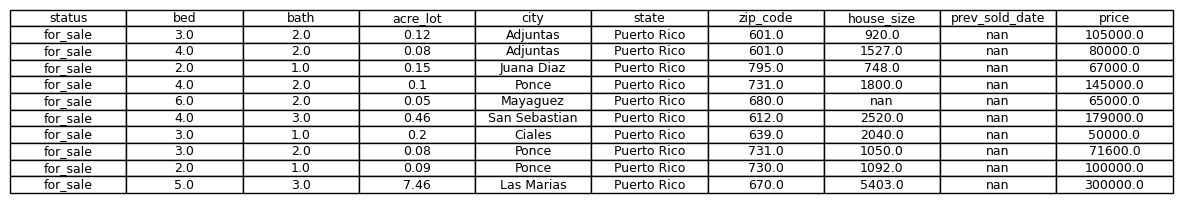

In [1]:
import matplotlib.pyplot as plt
from src.dataset_service import read_zip_csv

real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=10)

fig, ax = plt.subplots(figsize=(15, 2))  # Adjust figsize as necessary
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.show()

## Task 2.1: Implementing and Comparing Multiple Linear Regression

This section focuses on implementing a Multiple Linear Regression model using matrix multiplication and comparing its performance with the current implementation.

### 1. Implement Multiple Linear Regression using Matrix Multiplication
- Update the existing code to include an implementation of Multiple Linear Regression based on matrix operations.
- This involves representing the input features and model parameters as matrices and performing matrix multiplication to compute predictions.
- Ensure that the implementation can handle multiple input features and is scalable for larger datasets.

### 2. Performance Comparison
- After implementing the matrix-based approach, conduct a performance comparison between this new method and the current implementation of Multiple Linear Regression.
- The comparison criteria should include:
  - **Accuracy**: Compare the prediction accuracy of both implementations on a test dataset.
  - **Efficiency**: Measure and compare the time taken and computational resources used by both methods during training and prediction.
  - **Scalability**: Assess how well each implementation scales with an increase in data size and number of features.



In [2]:
import math
import numpy as np
from src.dataset_service import read_zip_csv

# Read data
real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=700)
# Create separated dataset and drop all nan
new_df = df[['bed', 'bath', 'house_size', 'price']]
new_df = new_df.dropna()


def normalize(feature):
    # Calculate the mean (average) of the feature values.
    # 'sum(feature)' computes the total sum of the feature values.
    # 'len(feature)' gives the number of values in the feature.
    mean = sum(feature) / len(feature)
    
    # Calculate the standard deviation (std) of the feature values.
    # 1. For each value xi in the feature, we compute (xi - mean)^2 which represents the squared difference 
    #    between the value and the mean. This helps measure the spread of the data.
    # 2. 'sum([(xi - mean) ** 2 for xi in feature])' computes the total sum of these squared differences.
    # 3. Dividing by 'len(feature)' gives the variance (mean of the squared differences).
    # 4. Taking the square root of the variance gives the standard deviation.
    std = math.sqrt(sum([(xi - mean) ** 2 for xi in feature]) / len(feature))
    
    # Normalize each value in the feature using Z-score normalization.
    # For each value xi in the feature, we subtract the mean and then divide by the standard deviation.
    # This process scales the values such that the feature has a mean of 0 and a standard deviation of 1.
    # This is particularly useful in many machine learning algorithms to ensure that all features have 
    # the same scale.
    return [(xi - mean) / std for xi in feature]

#TODO implement matrix for the X features 
#x1 = normalize(new_df['bed'].values)
#x2 = normalize(new_df['bath'].values)
#x3 = normalize(new_df['house_size'].values)
#y = normalize(new_df['price'].values)

#for test
x1 = [2,4,6,8,10,12,14,16,18,20]
x2 = [12,14,16,18,110,112,114,116,118,120]
x3 = [2,4,6,8,10,12,14,16,18,20]
y = [1,2,3,4,5,6,7,8,9,10]

print("bed ->", x1[:10])
print("bath -> ", x2[:10])
print("house_size -> ", x3[:10])
print("target y -> ", y[:10])


def compute_mse(w1, w2, w3, b, x1, x2, x3, y):
    """Compute the Mean Squared Error."""
    #TODO add detailed comments with explanation of your algorithm implementation
    n = len(x1)
    total_error = sum((y[i] - (w1*x1[i] + w2*x2[i] + w3*x3[i] + b))**2 for i in range(n))
    mse = total_error / n
    return mse 

def compute_gradients(w1, w2, w3, b, x1, x2, x3, y):
    n = len(y)
    
    total_gradient_w1 = 0
    total_gradient_w2 = 0
    total_gradient_w3 = 0
    total_gradient_b = 0
    
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(n):
        #TODO implement me 
        predicted_y = w1*x1[i] + w2*x2[i] + w3*x3[i] + b
        difference = y[i] - predicted_y
        
        total_gradient_w1 -= x1[i] * difference
        total_gradient_w2 -= x2[i] * difference
        total_gradient_w3 -= x3[i] * difference
        total_gradient_b -= difference

    dw1 = (-2/n) * total_gradient_w1
    dw2 = (-2/n) * total_gradient_w2
    dw3 = (-2/n) * total_gradient_w3
    db = (-2/n) * total_gradient_b
    
    return dw1, dw2, dw3, db

def gradient_descent(x1, x2, x3, y, w1_init, w2_init, w3_init, b_init, learning_rate, num_iterations):
    w1, w2, w3, b = w1_init, w2_init, w3_init, b_init
    mse_history = []
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(num_iterations):
        dw1, dw2, dw3, db = compute_gradients(w1, w2, w3, b, x1, x2, x3, y)
        w1 += learning_rate * dw1
        w2 += learning_rate * dw2
        w3 += learning_rate * dw3
        b += learning_rate * db
        mse = compute_mse(w1, w2, w3, b, x1, x2, x3, y)
        mse_history.append(mse)
    
    return w1, w2, w3, b, mse_history


# Parameters
learning_rate = 0.0001
num_iterations = 20000

#TODO implement matrix for the W 
initial_w1 = 0.1
initial_w2 = 0.1
initial_w3 = 0.1
initial_b = 1

final_w1, final_w2, final_w3, final_b, mse_history = gradient_descent(x1, x2, x3, y, initial_w1, initial_w2, initial_w3, initial_b, learning_rate, num_iterations)

for i in range(0,len(mse_history),50):
    print("MSE:",mse_history[i])


bed -> [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
bath ->  [12, 14, 16, 18, 110, 112, 114, 116, 118, 120]
house_size ->  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
target y ->  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MSE: 17.698112809600023
MSE: 0.5569712506905474
MSE: 0.4412282687183432
MSE: 0.3637534426986006
MSE: 0.31179956256031405
MSE: 0.2768659385922203
MSE: 0.2532837423920451
MSE: 0.23727261843010655
MSE: 0.22631157010027797
MSE: 0.21871942483315676
MSE: 0.21337506042142468
MSE: 0.2095308333866293
MSE: 0.20668816064576542
MSE: 0.20451454911846936
MSE: 0.20278826556870005
MSE: 0.20136143878711205
MSE: 0.20013545368013622
MSE: 0.19904454241730235
MSE: 0.1980448419204139
MSE: 0.19710709667183776
MSE: 0.19621179246324577
MSE: 0.19534591125659126
MSE: 0.19450076711020903
MSE: 0.19367056303078609
MSE: 0.1928514285865145
MSE: 0.19204077812365672
MSE: 0.19123688278273063
MSE: 0.19043858509044725
MSE: 0.18964510863061787
MSE: 0.18885593112001836
MSE: 0.188070699766883
MSE: 0.1872891748262592
MSE: 0.18651119

### Plot the results

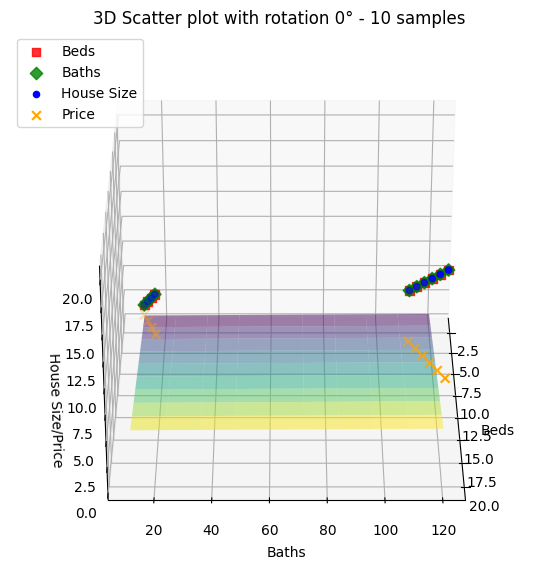

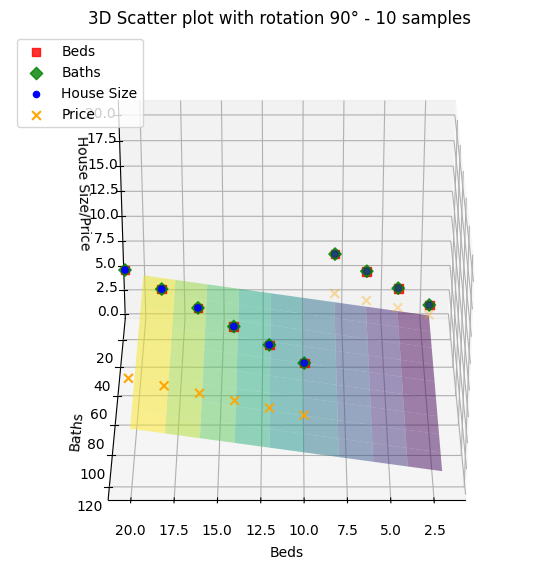

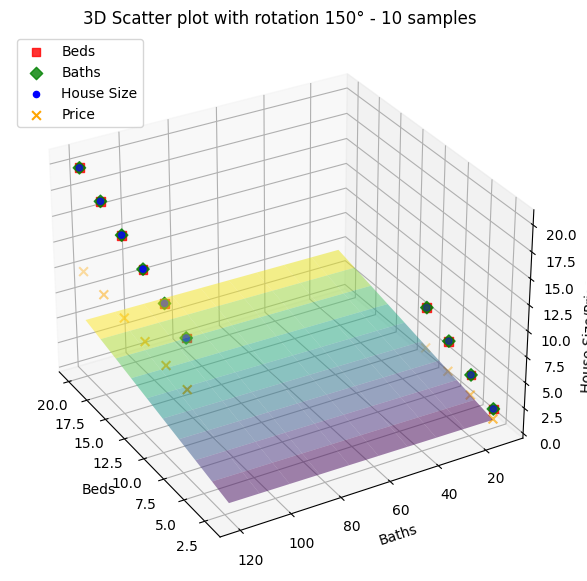

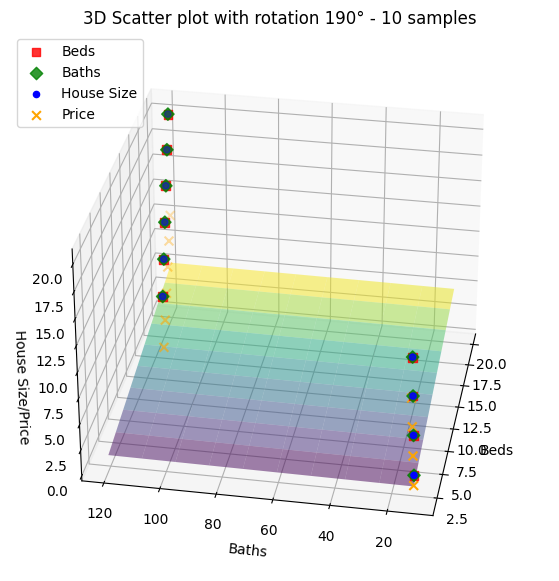

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b):
    # Define a colormap with four colors: red, green, blue, orange
    colors = ['red', 'green', 'blue', 'orange']
    cmap_name = 'custom_div_cmap'
    cm = ListedColormap(colors, name=cmap_name, N=None)

    viewpoints = [0, 90, 150, 190]  # Four different rotation angles for demonstration

    num_samples = len(x1)  # Compute the number of samples

    for view in viewpoints:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot of the actual data for Beds, Baths, House Size, and Price
        ax.scatter(x1, x2, x3, c='red', marker='s', s=40, alpha=0.8, label='Beds') # Square marker
        ax.scatter(x1, x2, x3, c='green', marker='D', s=40, alpha=0.8, label='Baths') # Diamond marker
        ax.scatter(x1, x2, x3, c='blue', marker='o', s=20, label='House Size')
        ax.scatter(x1, x2, y, c='orange', marker='x', s=40, label='Price')

        # Create a meshgrid for the plane
        x1_range = np.linspace(min(x1), max(x1), 10)
        x2_range = np.linspace(min(x2), max(x2), 10)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        x3_pred = final_w1 * x1_grid + final_w2 * x2_grid + final_b

        # Plot the regression plane
        ax.plot_surface(x1_grid, x2_grid, x3_pred, alpha=0.5, cmap='viridis', shade=True)

        ax.set_xlabel('Beds')
        ax.set_ylabel('Baths')
        ax.set_zlabel('House Size/Price')

        ax.legend(loc='upper left')  # Display legend

        # Set the viewpoint rotation
        ax.view_init(elev=None, azim=view)

        plt.title(f"3D Scatter plot with rotation {view}° - {num_samples} samples")
        plt.show()

# Sample call (replace with your data and weights)
plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b)


## Task 2.2: Multiple Linear Regression with scikit-learn

### Dataset Investigation and Feature Selection
- Load and explore `./data/realtor_data_usa.csv.zip`.
- Clean and preprocess the data.
- Identify key features through statistical analysis and domain knowledge.

### Implementation with scikit-learn
- Use scikit-learn for Multiple Linear Regression (refer to [scikit-learn documentation](https://scikit-learn.org/stable/)).
- Split data into training and testing sets.
- Train the model on the training set and evaluate using metrics like R², MSE, or MAE on the test set.
- Document the implementation process and model performance.


In [4]:
import pandas as pd
import numpy as np

In [5]:
realtor = pd.read_csv(
    'C:/realtor_data_usa/realtor_data_usa.csv',
    sep = ',',
    header = 0
)
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [6]:
realtor

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


In [7]:
realtor = realtor.dropna ()

In [8]:
realtor = realtor.drop(columns = ['status', 'acre_lot', 'city', 'state', 'zip_code', 'prev_sold_date'], axis = 1) 

In [9]:
realtor

,bed,bath,house_size,price
829,7.0,3.0,1192.0,110000.0
3380,7.0,3.0,1192.0,110000.0
5083,7.0,3.0,1192.0,110000.0
5387,7.0,3.0,1192.0,110000.0
9053,7.0,3.0,1192.0,110000.0
...,...,...,...,...
904932,5.0,6.0,7023.0,3695000.0
904934,4.0,8.0,9000.0,5600000.0
904935,6.0,8.0,7584.0,3650000.0
904937,4.0,7.0,6806.0,4999999.0


In [10]:
realtor = realtor.reset_index(drop=True)

In [11]:
realtor

,bed,bath,house_size,price
0,7.0,3.0,1192.0,110000.0
1,7.0,3.0,1192.0,110000.0
2,7.0,3.0,1192.0,110000.0
3,7.0,3.0,1192.0,110000.0
4,7.0,3.0,1192.0,110000.0
...,...,...,...,...
226621,5.0,6.0,7023.0,3695000.0
226622,4.0,8.0,9000.0,5600000.0
226623,6.0,8.0,7584.0,3650000.0
226624,4.0,7.0,6806.0,4999999.0


In [12]:
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226626 entries, 0 to 226625
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         226626 non-null  float64
 1   bath        226626 non-null  float64
 2   house_size  226626 non-null  float64
 3   price       226626 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


Mean Squared Error: 1281643503428.1729
r2: 0.28332404051448246


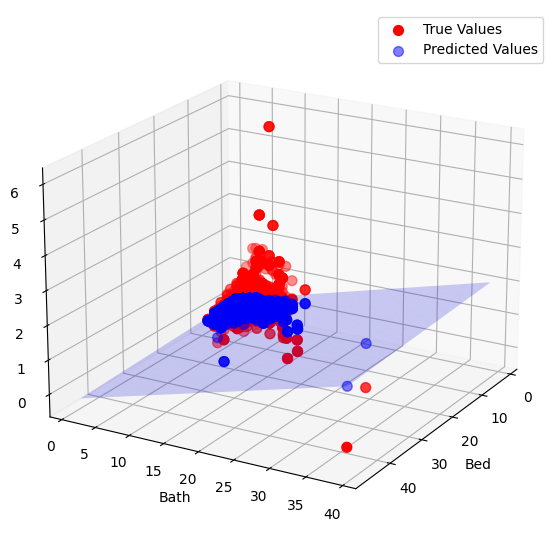

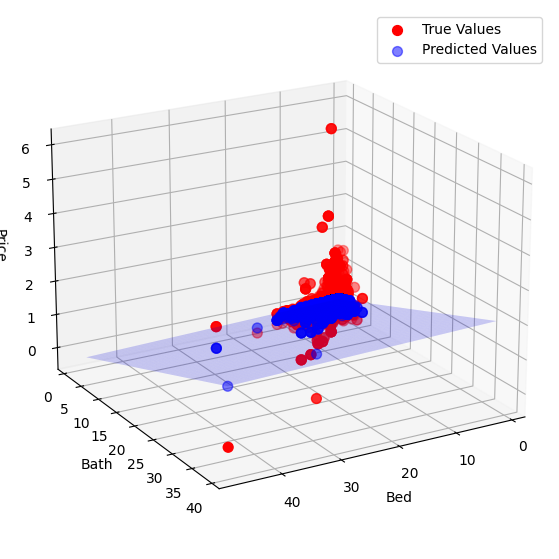

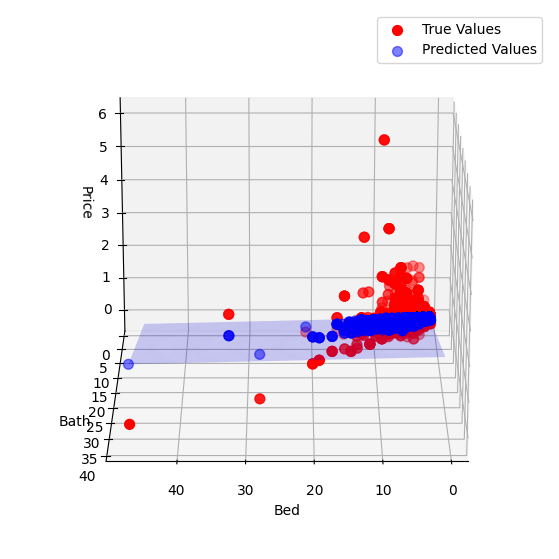

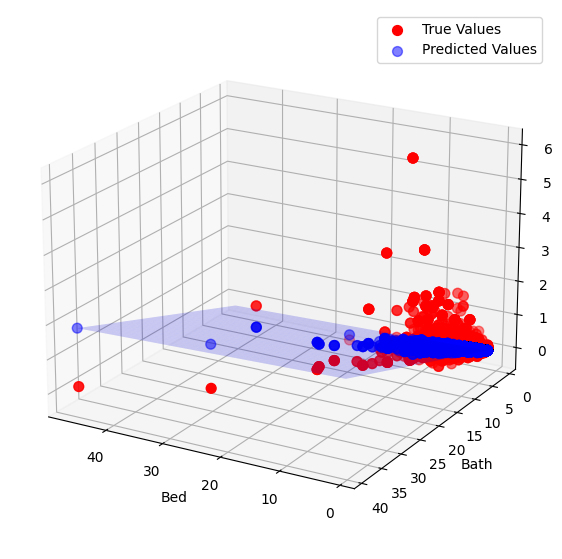

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def plot_3d(X, y, model, angle1, angle2):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Predictions for the grid with 125 points along each axis
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 125), 
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 125))
    
    zz = model.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    
    # Scatter plot of the true values in red
    ax.scatter(X[:, 0], X[:, 1], y, color='red', s=50, label='True Values')
    
    # Scatter plot of the predicted points on the regression plane in blue
    ax.scatter(X[:, 0], X[:, 1], model.predict(X), color='blue', s=50, alpha=0.5, label='Predicted Values')
    
    # Surface plot of the predicted plane in a transparent shade
    ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)
    
    ax.set_xlabel('Bed')
    ax.set_ylabel('Bath')
    ax.set_zlabel('Price')
    ax.legend()
    
    ax.view_init(angle1, angle2)
    plt.show()

# Sample data
x1 = realtor['bed'].values
x2 = realtor['bath'].values
y = realtor['price'].values  # Sample target variable

X = np.column_stack((x1, x2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")    
print(f"r2: {r2}") 
# Plot from 4 different angles
angles = [(20, 30), (20, 60), (20, 90), (20, 120)]
for angle in angles:
    plot_3d(X_test, y_test, model, angle[0], angle[1])
